In [109]:
import json
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
projectId = "api-vicuna-deno-main"
folder_path = "../../test_files/"
nodes_path = f"{folder_path}/{projectId}/nodes.json"
links_path = f"{folder_path}/{projectId}/links.json"






In [110]:
# Function to read JSON files
def read_json(file_path):
    with open(file_path, 'r',encoding="utf8") as file:
        return json.load(file)
def save_json(data, file_path):
    with open(file_path, 'w') as file:
        json.dump(data, file, indent=4)
# Function to construct graph from nodes and links
def construct_graph_from_json(nodes, links):
    G = nx.DiGraph()
    for node in nodes:
        G.add_node(node['id'], **node)
    for link in links:
        G.add_edge(link['source'], link['target'], **link)
    return G


In [111]:
# Read nodes and links from JSON files

nodes = read_json(nodes_path)

links = read_json(links_path)

G = construct_graph_from_json(nodes, links)
print(G)
# Calculate centralities
degree_centrality = nx.degree_centrality(G)
indegree_centrality = nx.in_degree_centrality(G)
outdegree_centrality = nx.out_degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
pagerank = nx.pagerank(G)
hits = nx.hits(G)
eigenvector_centrality = nx.eigenvector_centrality(G,10000)

# Print or use the centrality measures
print('Degree Centrality:', degree_centrality)
print("In Degree Centrality:", indegree_centrality)
print("Out Degree Centrality:", outdegree_centrality)
print('Betweenness Centrality:', betweenness_centrality)
print('Closeness Centrality:', closeness_centrality)
print('PageRank:', pagerank)
print('Hubs:', hits[0])
print('Authorities:', hits[1])
print('Eigenvector Centrality:', eigenvector_centrality)



df = pd.DataFrame({
    'degree': pd.Series(degree_centrality),
    "indegree": pd.Series(indegree_centrality),
    "outdegree": pd.Series(outdegree_centrality),
    'betweenness': pd.Series(betweenness_centrality),
    'closeness': pd.Series(closeness_centrality),
    'pagerank': pd.Series(pagerank),
    'hubs': pd.Series(hits[0]), #Hub: A node is high-quality if it links to many high-quality nodes
    'authorities': pd.Series(hits[1]), #Authority: A node is high-quality if many high-quality nodes link to it
    'eigenvector': pd.Series(eigenvector_centrality),
    "Node": degree_centrality.keys()
})
#Separate files and nodes
df.set_index('Node', inplace=True)

df_files = df[~df.index.str.contains(':')]
df_nodes = df[df.index.str.contains(':')]

# Normalize the centrality measures
df_files = (df_files - df_files.min()) / (df_files.max() - df_files.min())
df_nodes = (df_nodes - df_nodes.min()) / (df_nodes.max() - df_nodes.min())

# Sum the normalized centrality measures
df_files['combined_score'] = df_files.sum(axis=1)
df_nodes["combined_score"] = df_nodes.sum(axis=1)


most_important_nodes = df_nodes.sort_values(by='combined_score', ascending=False)
most_important_files = df_files.sort_values(by='combined_score', ascending=False)
#print('Most Important Nodes:', most_important_nodes)

most_important_nodes.to_csv(f'{projectId}-important-nodes.csv')
most_important_files.to_csv(f'{projectId}-important-files.csv')



DiGraph with 497 nodes and 1238 edges
Degree Centrality: {'\\crons\\usage-rds::getCurrentDateFormatted': 0.0020161290322580645, '\\crons\\usage-rds': 0.004032258064516129, '\\gen-env::envExample': 0.0020161290322580645, '\\gen-env::envText': 0.0020161290322580645, '\\gen-env::const': 0.0020161290322580645, '\\gen-env': 0.006048387096774193, '\\lib\\ai\\metadata::generateMetadata': 0.012096774193548387, '\\lib\\ai\\metadata': 0.0020161290322580645, '\\lib\\ai\\question-generator::anthropicFunction': 0.004032258064516129, '\\lib\\ai\\question-generator::questionGenerator': 0.006048387096774193, '\\lib\\ai\\question-generator::runtime': 0.0020161290322580645, '\\lib\\ai\\question-generator': 0.004032258064516129, '\\lib\\bugsnag::reportError': 0.04233870967741935, '\\lib\\bugsnag::Bugsnag': 0.008064516129032258, '\\lib\\bugsnag': 0.004032258064516129, '\\lib\\chat\\stream-reader': 0.0, '\\lib\\chat\\streaming::onFinal': 0.020161290322580645, '\\lib\\chat\\streaming::onToken': 0.0020161290

[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: > <AxesSubplot: >
 <AxesSubplot: > <AxesSubplot: > <AxesSubplot: > <AxesSubplot: >
 <AxesSubplot: > <AxesSubplot: >]


C:\Users\gmasc\AppData\Local\Temp\ipykernel_15984\3664448012.py:18: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig_nodes.tight_layout()


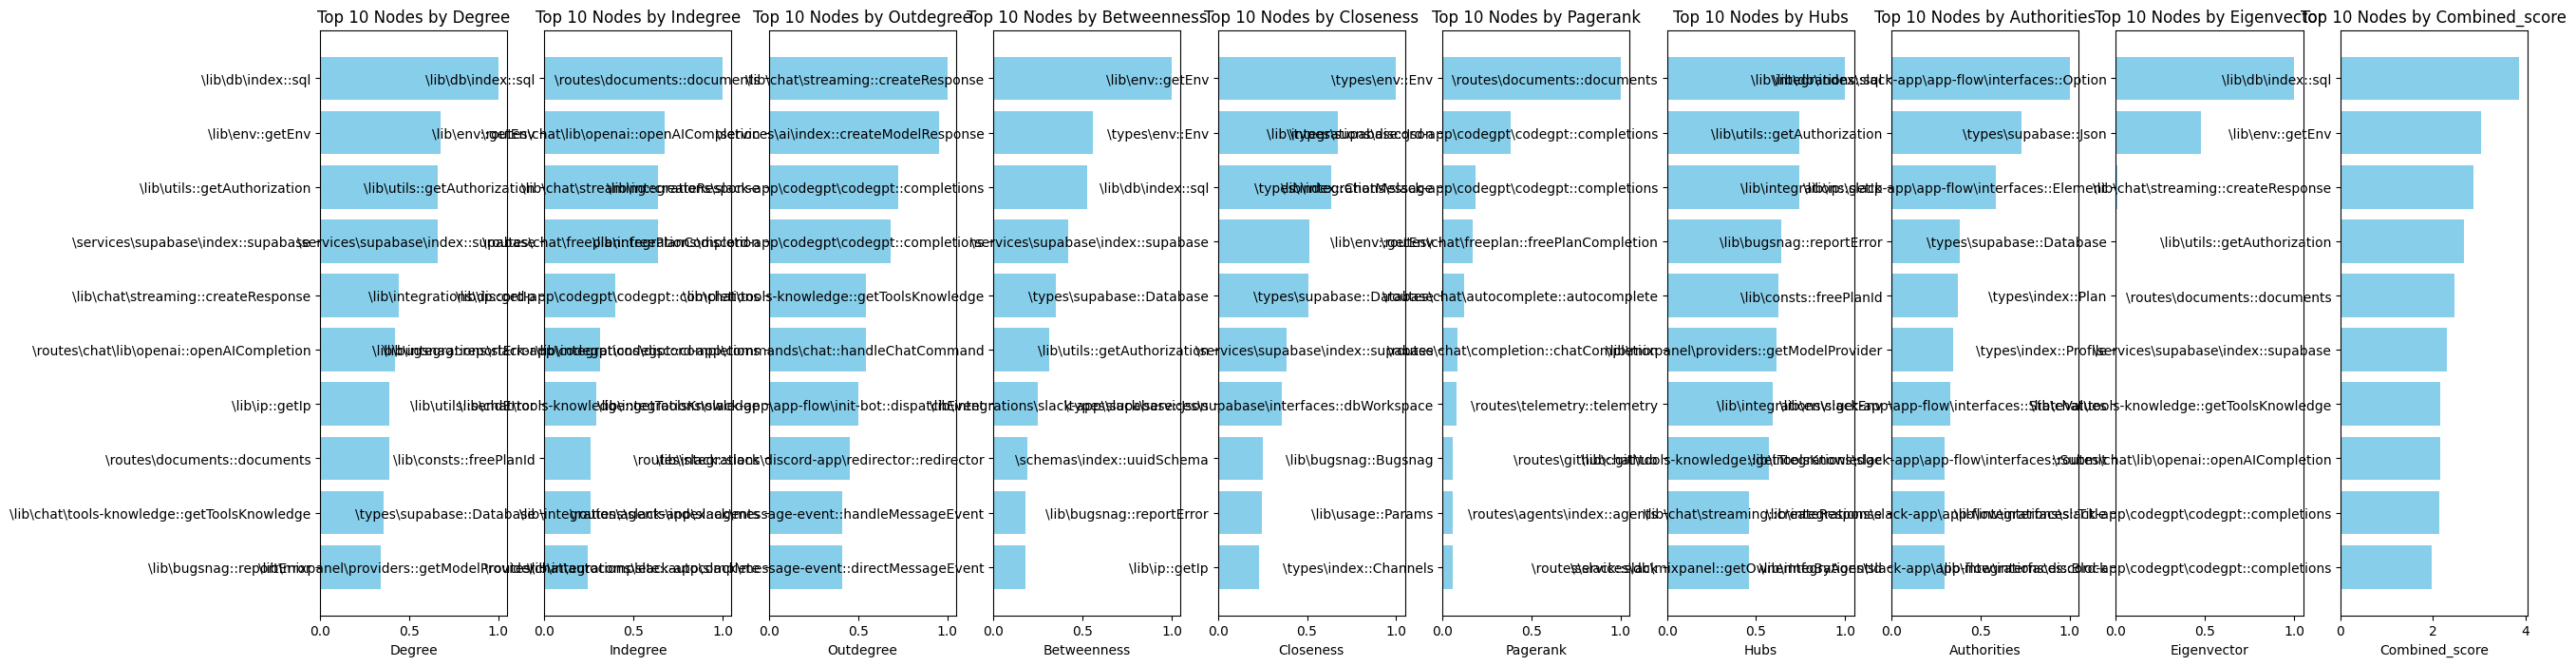

In [112]:

# Metrics to plot
metrics = ['degree', "indegree", "outdegree",'betweenness', 'closeness', 'pagerank', 'hubs', 'authorities', 'eigenvector',"combined_score"]

# Create a figure for nodes
fig_nodes, axes_nodes = plt.subplots(nrows=1, ncols=len(metrics), figsize=(30, 8))

# Plotting each metric for top 10 nodes
for i, metric in enumerate(metrics):
    top_10_nodes = df_nodes.sort_values(by=metric, ascending=False).head(10)
    
    # Plotting top 10 nodes
    axes_nodes[i].barh(top_10_nodes.index, top_10_nodes[metric], color='skyblue')
    axes_nodes[i].set_xlabel(metric.capitalize())
    axes_nodes[i].set_title(f'Top 10 Nodes by {metric.capitalize()}')
    axes_nodes[i].invert_yaxis()  # To display the highest centrality at the top
    axes_nodes[i].tick_params(axis='y', labelsize=8)

fig_nodes.tight_layout()
plt.show()

[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: > <AxesSubplot: >
 <AxesSubplot: > <AxesSubplot: > <AxesSubplot: > <AxesSubplot: >
 <AxesSubplot: > <AxesSubplot: >]


C:\Users\gmasc\AppData\Local\Temp\ipykernel_15984\2178491275.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig_files.tight_layout()


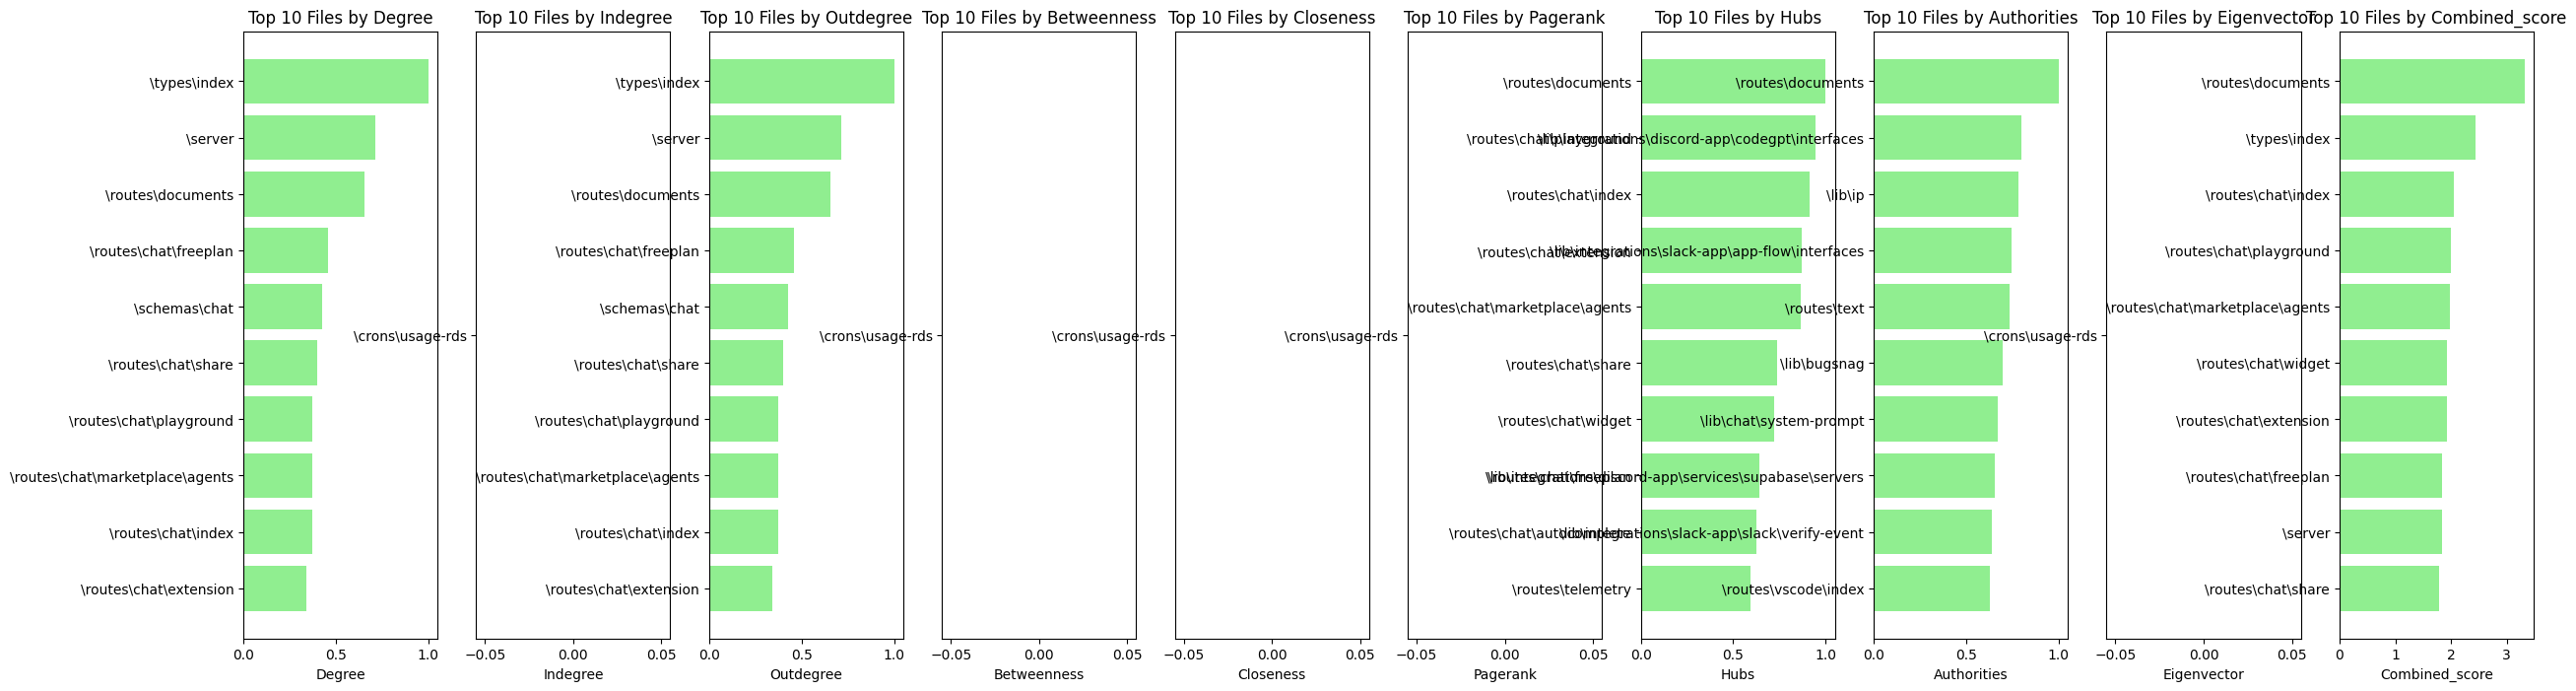

In [113]:
fig_files, axes_files = plt.subplots(nrows=1, ncols=len(metrics), figsize=(30, 8))

# Plotting each metric for top 10 files
for i, metric in enumerate(metrics):
    top_10_files = df_files.sort_values(by=metric, ascending=False).head(10)
    
    # Plotting top 10 files
    axes_files[i].barh(top_10_files.index, top_10_files[metric], color='lightgreen')
    axes_files[i].set_xlabel(metric.capitalize())
    axes_files[i].set_title(f'Top 10 Files by {metric.capitalize()}')
    axes_files[i].invert_yaxis()  # To display the highest centrality at the top
    axes_files[i].tick_params(axis='y', labelsize=8)

fig_files.tight_layout()
plt.show()